In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in the data

In [2]:
df = pd.read_csv('../resources/creativeclass200711.csv')

In [3]:
df.head()

,FIPS,State,State abr.,County,metro03,TotEmpEst,TotEmpSE,CCEst,CCSE,CCShare,CCShareSE,BohEST,BohSE,BohShare,BohShareSE,TotEmpRME,CCRME,BohRME,CCShareRME,BohShareRME
0,1001,Alabama,AL,Autauga County,1,24140,390.27,5680,318.54,0.23529,0.01264,140,40.73,0.0058,0.00168,642,524,67,0.02079,0.00277
1,1003,Alabama,AL,Baldwin County,0,79965,910.03,20535,637.08,0.2568,0.00741,835,137.99,0.010442,0.00172,1497,1048,227,0.01219,0.00283
2,1005,Alabama,AL,Barbour County,0,9635,369.6,1485,155.62,0.15413,0.01503,45,25.53,0.00467,0.00264,608,256,42,0.02473,0.00435
3,1007,Alabama,AL,Bibb County,1,9355,319.76,1355,203.65,0.14484,0.0212,15,15.81,0.001603,0.00169,526,335,26,0.03487,0.00278
4,1009,Alabama,AL,Blount County,1,24175,433.43,4090,288.15,0.16918,0.01153,95,46.81,0.00393,0.00193,713,474,77,0.01896,0.00318


In [4]:
df.count()

FIPS           3146
State          3142
State abr.     3142
County         3142
metro03        3146
TotEmpEst      3146
TotEmpSE       3146
CCEst          3146
CCSE           3146
CCShare        3146
CCShareSE      3146
BohEST         3146
BohSE          3146
BohShare       3146
BohShareSE     3146
TotEmpRME      3146
CCRME          3146
BohRME         3146
CCShareRME     3146
BohShareRME    3146
dtype: int64

In [5]:
df[df['TotEmpEst'] == '.']

,FIPS,State,State abr.,County,metro03,TotEmpEst,TotEmpSE,CCEst,CCSE,CCShare,CCShareSE,BohEST,BohSE,BohShare,BohShareSE,TotEmpRME,CCRME,BohRME,CCShareRME,BohShareRME
87,2231,NaN,NaN,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
250,8014,NaN,NaN,NaN,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
331,12025,NaN,NaN,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
1654,30113,NaN,NaN,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
2922,51560,Virginia,VA,Clifton Forge city,0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
2950,51780,Virginia,VA,South Boston City,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.


In [6]:
df = df.drop([87, 250, 331, 1654, 2922, 2950])

Remove rows with missing data

In [7]:
df['TotEmpEst'] = pd.to_numeric(df['TotEmpEst'])
df['CCEst'] = pd.to_numeric(df['CCEst'])

Total Employment ~ Creative Class Employment

Text(0,0.5,'Creative Class Employment')

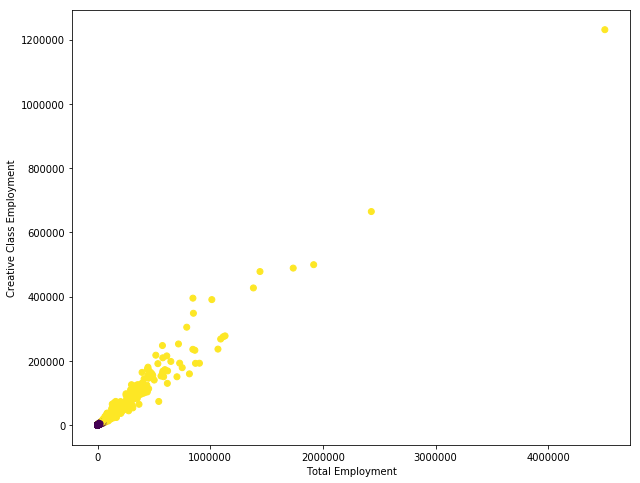

In [8]:
fig = plt.figure(figsize=(10, 8))
axs = fig.add_subplot(111)
axs.scatter(df['TotEmpEst'], df['CCEst'], c = df['metro03'])
axs.set_xlabel('Total Employment')
axs.set_ylabel('Creative Class Employment')

Total Employment ~ CC Employment with outlier exclusion

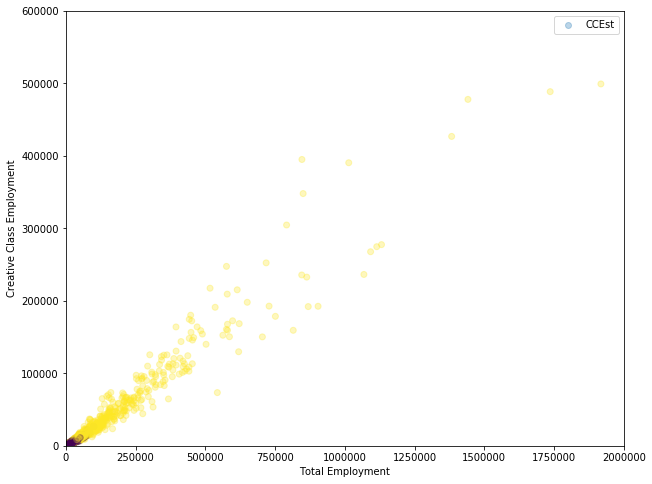

In [9]:
fig = plt.figure(figsize=(10, 8))
axs = fig.add_subplot(111)
axs.scatter(df['TotEmpEst'], df['CCEst'], c = df['metro03'], alpha = .3)
axs.set_xlabel('Total Employment')
axs.set_ylabel('Creative Class Employment')
axs.set_xlim([0, 2000000])
axs.set_ylim([0, 600000])
axs.legend()

Which are the outlier metros with really high employment? NYC, SF, Chicago?

In [10]:
df[['State', 'County', 'TotEmpEst']].sort_values(by = ['TotEmpEst'], ascending = False).head()

,State,County,TotEmpEst
203,California,Los Angeles County,4501380
610,Illinois,Cook County,2429270
2624,Texas,Harris County,1917790
102,Arizona,Maricopa County,1736115
214,California,Orange County,1441315


Where is NYC, does the borough system split up employment more than I would have guessed?

In [11]:
df[['State', 'County', 'TotEmpEst']][df['State'] == 'New York'].sort_values(by = ['TotEmpEst'], ascending = False).head()

,State,County,TotEmpEst
1852,New York,Kings County,1092325
1869,New York,Queens County,1068375
1859,New York,New York County,846255
1880,New York,Suffolk County,728495
1858,New York,Nassau County,650325


They are not far from the top, together Brooklyn, Queens and Manhattan would be above Chicago.

Total Employment ~ CC Share

In [12]:
df['CCShare'] = pd.to_numeric(df['CCShare'])

Text(0,0.5,'Creative Class Share')

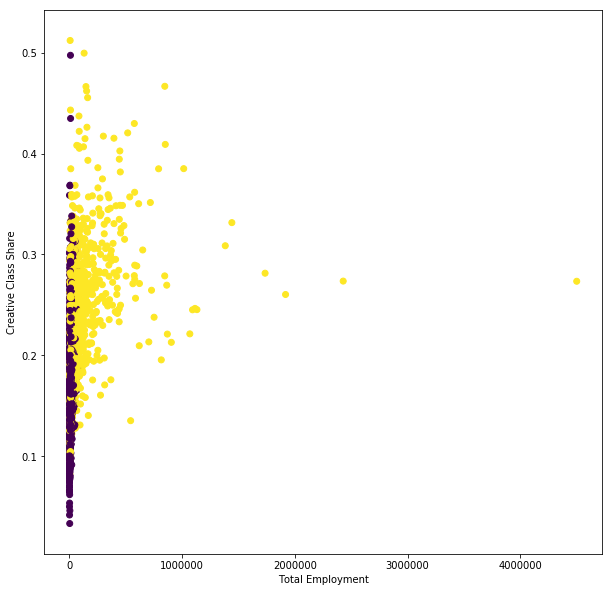

In [13]:
fig = plt.figure(figsize=(10, 10))
axs = fig.add_subplot(111)
axs.scatter(df['TotEmpEst'], df['CCShare'], c = df['metro03'])
axs.set_xlabel('Total Employment')
axs.set_ylabel('Creative Class Share')

With outlier exclusion

(0, 200000)

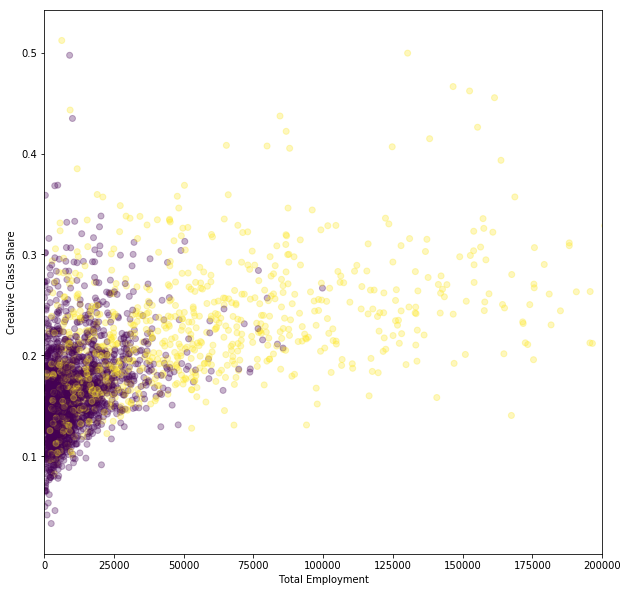

In [14]:
fig = plt.figure(figsize=(10, 10))
axs = fig.add_subplot(111)
axs.scatter(df['TotEmpEst'], df['CCShare'], c = df['metro03'], alpha = .3)
axs.set_xlabel('Total Employment')
axs.set_ylabel('Creative Class Share')
axs.set_xlim([0, 200000])

It looks like the places with the lowest CC shares are low employment rural areas.  
There are a couple low employment rural areas with very high CC shares and there are a number of rural areas with above average CC shares.  
There is a clear grouping of rural areas with low employment and CC share of between .1 and .18.  
Metro areas have a wide range of total employment figures, but they also look to have a higher CC share than rural areas on average.

In [15]:
df[['CCShare', 'metro03']].groupby('metro03').describe()

CCShare                                                            \
          count      mean       std      min       25%      50%       75%   
metro03                                                                     
0        2051.0  0.163063  0.043358  0.03320  0.135665  0.15743  0.183985   
1        1089.0  0.225025  0.065760  0.08243  0.177220  0.21726  0.263240   

                  
             max  
metro03           
0        0.49754  
1        0.51223

Metro areas have the higher CCShare average and greater variation.  
The lower quartile for metro areas is about 4 percentage points higher than for rural areas.  
Both metro and rural areas have a higher mean than median, pointing a the long upper tail in CCShare.  
The upper quartile for metro areas is about 8 percentage points higher than for rural areas, greater than the difference in medians and double the difference in lower quartiles.

In [16]:
df_keep = df[['FIPS', 'State', 'State abr.', 'County', 'metro03', 'TotEmpEst', 'CCShare']]

In [17]:
df_keep.columns = ['FIPS', 'state', 'stateAbr', 'county', 'metro', 'totEmp', 'ccShare']

In [23]:
df_keep['totEmp'].describe()

count    3.140000e+03
mean     4.515940e+04
std      1.454338e+05
min      4.500000e+01
25%      4.622500e+03
50%      1.084000e+04
75%      2.952125e+04
max      4.501380e+06
Name: totEmp, dtype: float64

In [19]:
df_keep.to_csv('../resources/ccShare.csv', index=False)

In [20]:
df.columns

Index(['FIPS', 'State', 'State abr.', 'County', 'metro03', 'TotEmpEst',
       'TotEmpSE', 'CCEst', 'CCSE', 'CCShare', 'CCShareSE', 'BohEST', 'BohSE',
       'BohShare', 'BohShareSE', 'TotEmpRME', 'CCRME', 'BohRME', 'CCShareRME',
       'BohShareRME'],
      dtype='object')